In [1]:
1+2

3

In [2]:
print("Hello World")

Hello World


In [3]:
import plotly


ModuleNotFoundError: No module named 'plotly'

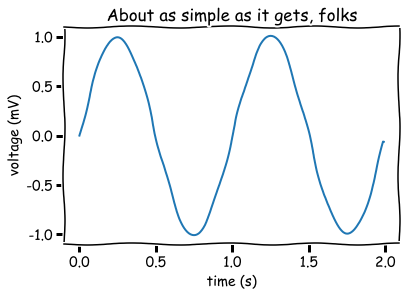

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.xkcd

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s =  np.sin(2 * np.pi * t)

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

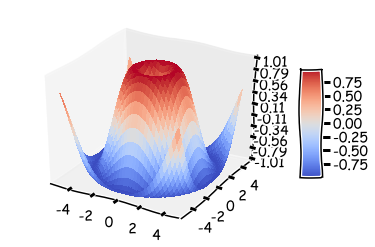

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

plt.xkcd
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

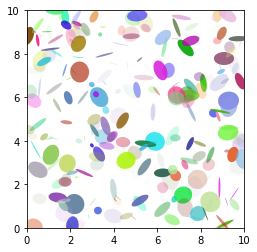

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

NUM = 250

ells = [Ellipse(xy=np.random.rand(2) * 10,
                width=np.random.rand(), height=np.random.rand(),
                angle=np.random.rand() * 360)
        for i in range(NUM)]

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(np.random.rand())
    e.set_facecolor(np.random.rand(3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)


plt.show()

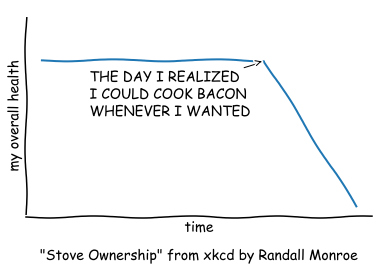

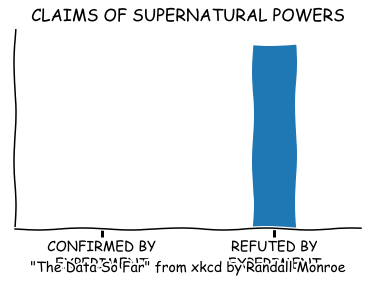

In [12]:
import matplotlib.pyplot as plt
import numpy as np

with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Monroe
    # http://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.xticks([])
    plt.yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    plt.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    plt.plot(data)

    plt.xlabel('time')
    plt.ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Monroe',
        ha='center')

    # Based on "The Data So Far" from XKCD by Randall Monroe
    # http://xkcd.com/373/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.bar([0, 1], [0, 100], 0.25)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim([0, 110])
    ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
    plt.yticks([])

    plt.title("CLAIMS OF SUPERNATURAL POWERS")

    fig.text(
        0.5, 0.05,
        '"The Data So Far" from xkcd by Randall Monroe',
        ha='center')

plt.show()

In [1]:
import numpy as np
import pandas as pd

from bokeh.plotting import figure, show, output_file
from bokeh.palettes import brewer

N = 20
categories = ['y' + str(x) for x in range(10)]
data = {}
data['x'] = np.arange(N)
for cat in categories:
    data[cat] = np.random.randint(10, 100, size=N)

df = pd.DataFrame(data)
df = df.set_index(['x'])

def stacked(df, categories):
    areas = dict()
    last = np.zeros(len(df))
    for cat in categories:
        next = last + df[cat]
        areas[cat] = np.hstack((last[::-1], next))
        last = next
    return areas

areas = stacked(df, categories)

colors = brewer["Spectral"][len(areas)]

x2 = np.hstack((data['x'][::-1], data['x']))

p = figure(x_range=(0, 19), y_range=(0, 800))
p.grid.minor_grid_line_color = '#eeeeee'

p.patches([x2] * len(areas), [areas[cat] for cat in categories],
          color=colors, alpha=0.8, line_color=None)
##output_file("brewer.html", title="brewer.py example")

show(p)

In [19]:
array=np.random.randint(10,size=6)

In [20]:
array

array([8, 3, 9, 4, 7, 4])

In [23]:
print("dtype",array.dtype)

dtype int32


In [2]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure
from bokeh.sampledata.periodic_table import elements
from bokeh.transform import dodge, factor_cmap

output_file("periodic.html")

periods = ["I", "II", "III", "IV", "V", "VI", "VII"]
groups = [str(x) for x in range(1, 19)]

df = elements.copy()
df["atomic mass"] = df["atomic mass"].astype(str)
df["group"] = df["group"].astype(str)
df["period"] = [periods[x-1] for x in df.period]
df = df[df.group != "-"]
df = df[df.symbol != "Lr"]
df = df[df.symbol != "Lu"]

cmap = {
    "alkali metal"         : "#a6cee3",
    "alkaline earth metal" : "#1f78b4",
    "metal"                : "#d93b43",
    "halogen"              : "#999d9a",
    "metalloid"            : "#e08d49",
    "noble gas"            : "#eaeaea",
    "nonmetal"             : "#f1d4Af",
    "transition metal"     : "#599d7A",
}

source = ColumnDataSource(df)

p = figure(title="Periodic Table (omitting LA and AC Series)", plot_width=1000, plot_height=450,
           tools="", toolbar_location=None,
           x_range=groups, y_range=list(reversed(periods)))

p.rect("group", "period", 0.95, 0.95, source=source, fill_alpha=0.6, legend="metal",
       color=factor_cmap('metal', palette=list(cmap.values()), factors=list(cmap.keys())))

text_props = {"source": source, "text_align": "left", "text_baseline": "middle"}

x = dodge("group", -0.4, range=p.x_range)

r = p.text(x=x, y="period", text="symbol", **text_props)
r.glyph.text_font_style="bold"

r = p.text(x=x, y=dodge("period", 0.3, range=p.y_range), text="atomic number", **text_props)
r.glyph.text_font_size="8pt"

r = p.text(x=x, y=dodge("period", -0.35, range=p.y_range), text="name", **text_props)
r.glyph.text_font_size="5pt"

r = p.text(x=x, y=dodge("period", -0.2, range=p.y_range), text="atomic mass", **text_props)
r.glyph.text_font_size="5pt"

p.text(x=["3", "3"], y=["VI", "VII"], text=["LA", "AC"], text_align="center", text_baseline="middle")

p.add_tools(HoverTool(tooltips = [
    ("Name", "@name"),
    ("Atomic number", "@{atomic number}"),
    ("Atomic mass", "@{atomic mass}"),
    ("Type", "@metal"),
    ("CPK color", "$color[hex, swatch]:CPK"),
    ("Electronic configuration", "@{electronic configuration}"),
]))

p.outline_line_color = None
p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_standoff = 0
p.legend.orientation = "horizontal"
p.legend.location ="top_center"

show(p)